IMPORTING THE DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA COLLECTION AND PREPROCESSING

 1.Import the dataset and explore basic info (nulls, data types).


In [2]:
# importing the dataset into a pandas dataframe
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
# number of rows and columns in a dataset
print('number of rows and columns in a dataset:')

titanic_data.shape

number of rows and columns in a dataset:


(891, 12)

In [8]:
# first 5 rows in a dataset
print('first 5 rows in a dataset:')
titanic_data.head()

first 5 rows in a dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# data types in a dataset
print('data types in a dataset:')
titanic_data.info()

data types in a dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# find missing values in a datset
print('find missing values in a datset:')
titanic_data.isnull().sum()

find missing values in a datset:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


HANDLING MISSING VALUES


 2.Handle missing values using mean/median/imputation.


In [11]:
# fill missing age values with the mean
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [12]:
# fill missing embarked vales with the mode
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [14]:
# drop the cabin column due to a large number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

In [15]:
# find missing values in a dataset
print('find missing values in a datset:')
titanic_data.isnull().sum()

find missing values in a datset:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


ENCODE CATEGORICAL FEATURES

 3.Convert categorical features into numerical using encoding.


In [16]:
# display the first 5 rows of a dataset after updating
print('display the first 5 rows of a dataset after updating:')
titanic_data.head()

display the first 5 rows of a dataset after updating:


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


NORMALIZE NUMERICAL FEATURES

 4.Normalize/standardize the numerical features.


In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize (excluding PassengerId and Survived)
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
# Initialize the StandardScaler
Scalar = StandardScaler()

In [19]:
# Apply standardization to the numerical columns
titanic_data[numerical_columns] = Scalar.fit_transform(titanic_data[numerical_columns])

In [20]:
# Display the first few rows of the updated DataFrame to see the scaled features

print('dataframe after standardization:')
titanic_data.head()

dataframe after standardization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,-0.789272,0.827377,"Braund, Mr. Owen Harris",male,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,S
1,-1.726220,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,0.432793,-0.473674,PC 17599,0.786845,C
2,-1.722332,1.266990,0.827377,"Heikkinen, Miss. Laina",female,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,S
3,-1.718444,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,0.432793,-0.473674,113803,0.420730,S
4,-1.714556,-0.789272,0.827377,"Allen, Mr. William Henry",male,0.407926,-0.474545,-0.473674,373450,-0.486337,S


VISUALIZE AND HANDLE OUTLIERS

 5.Visualize outliers using boxplots and remove them.


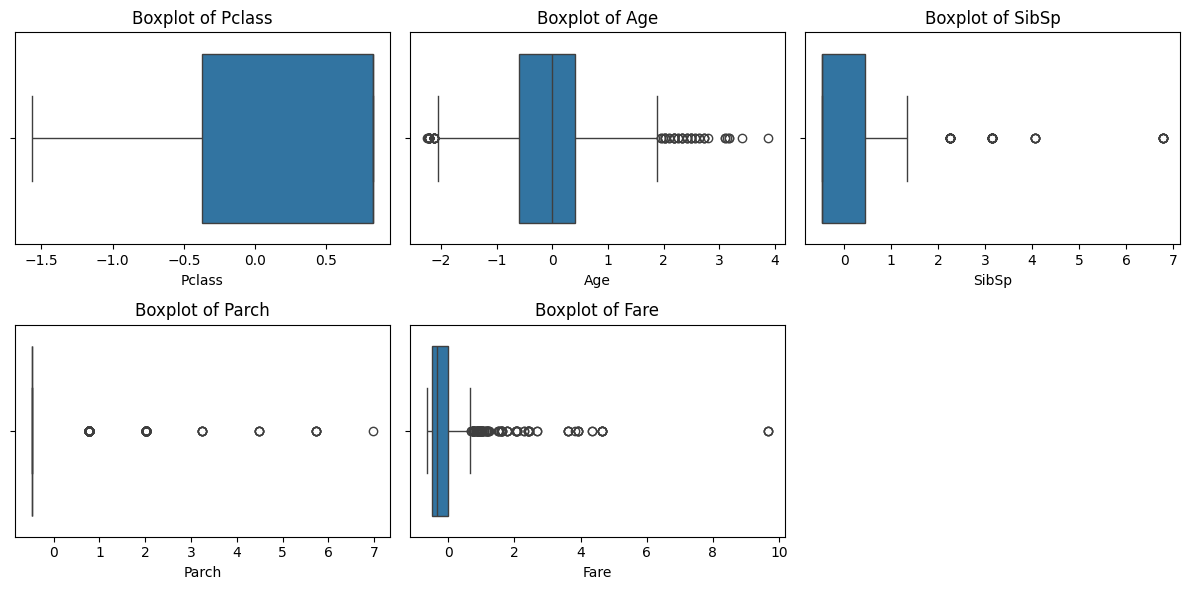

In [22]:
# Select numerical columns for visualizing outliers (excluding PassengerId and Survived)

numerical_cols_for_outliers = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create boxplots for each numerical column to visualize outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols_for_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
